In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Installing dependencies

In [2]:
!pip install asr-evaluation

In [3]:
!wget https://objectstore.e2enetworks.net/indic-asr-public/indicwhisper/all_lang_models/hindi_models.zip

--2024-09-10 12:34:59--  https://objectstore.e2enetworks.net/indic-asr-public/indicwhisper/all_lang_models/hindi_models.zip
Resolving objectstore.e2enetworks.net (objectstore.e2enetworks.net)... 164.52.210.97, 164.52.206.154, 101.53.152.33, ...
Connecting to objectstore.e2enetworks.net (objectstore.e2enetworks.net)|164.52.210.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4262614425 (4.0G) [application/zip]
Saving to: ‘hindi_models.zip’

hindi_models.zip    100%[===================>]   3.97G  11.1MB/s    in 6m 12s  

2024-09-10 12:41:12 (10.9 MB/s) - ‘hindi_models.zip’ saved [4262614425/4262614425]



In [4]:
!wget -O /content/kathbath.zip "https://objectstore.e2enetworks.net/indic-asr-public/indicwhisper/vistaar/kathbath.zip"

--2024-09-10 12:41:12--  https://objectstore.e2enetworks.net/indic-asr-public/indicwhisper/vistaar/kathbath.zip
Resolving objectstore.e2enetworks.net (objectstore.e2enetworks.net)... 101.53.136.19, 101.53.152.30, 164.52.210.97, ...
Connecting to objectstore.e2enetworks.net (objectstore.e2enetworks.net)|101.53.136.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9187772731 (8.6G) [application/zip]
Saving to: ‘/content/kathbath.zip’

/content/kathbath.z 100%[===================>]   8.56G  18.5MB/s    in 8m 11s  

2024-09-10 12:49:26 (17.8 MB/s) - ‘/content/kathbath.zip’ saved [9187772731/9187772731]



In [5]:
!unzip /content/kathbath.zip -d /content/kathbath
!rm -rf /content/kathbath.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930763908-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930724288-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930645739-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930978495-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930900106-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930581430-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930526312-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930663936-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/844424930958297-324-f.wav  
  inflating: /content/kathbath/kathbath/kannada/test_known/audio/324/8444249

In [6]:
!unzip /content/hindi_models.zip -d /content/vistaar_models
!rm -rf /content/hindi_models.zip

Archive:  /content/hindi_models.zip
   creating: /content/vistaar_models/hindi_models/
   creating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/tokenizer_config.json  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/merges.txt  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/rng_state_1.pth  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/rng_state_0.pth  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/vocab.json  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/added_tokens.json  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/training_args.bin  
 extracting: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/latest  
  inflating: /content/vistaar_models/hindi_models/whisper-large-hi-noldcil/zero_to_fp32.py  
  inflati

In [11]:
from transformers import pipeline

model_path = "/content/vistaar_models/hindi_models/whisper-medium-hi_alldata_multigpu"
device = "cuda"
lang_code = "hi"

whisper_asr = pipeline("automatic-speech-recognition", model=model_path, device=device)


Let us test on a single sample of audio

In [24]:
from IPython.display import Audio, display
sample_file = '/content/kathbath/kathbath/hindi/test_known/audio/1052/844424933454281-1052-m.wav'
display(Audio(sample_file,autoplay=False))
whisper_asr(sample_file)['text']

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


'हेमचंद्र के अनुकार्थ संग्रह में यशसी विस्तारी प्रसादी कर्द में पीछ दिया गया है'

We will work on test dataset, not test_known to find accracy on unseen data

In [14]:
import os
i = 0
done = False
file_names = []
file_paths = []
trans = []
audio_dir = '/content/kathbath/kathbath/hindi/test/audio'

for root, dirs, files in os.walk(audio_dir):
    for file in files:
        if file.endswith('.wav'):
            wav_path = os.path.join(root, file)
            file_names.append(file)
            file_paths.append(wav_path)
            transcript = whisper_asr(wav_path)['text']
            trans.append(transcript)
            i = i + 1
            print(i)
            if i == 100:
                done = True
                break
    if done:
        break


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


1


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


2


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


3


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


4


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


5


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


6


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


7


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


8


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


9


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


10


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


11


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


12


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


13


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


14


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


15


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


16


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


17


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


18


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


19


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


20


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


21


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


22


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


23


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


24


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


25


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


26


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


27


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


28


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


29


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


30


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


31


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


32


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


33


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


34


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


35


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


36


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


37


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


38


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


39


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


40


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


41


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


42


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


43


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


44


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


45


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


46


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


47


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


48


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


49


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


50


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


51


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


52


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


53


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


54


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


55


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


56


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


57


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


58


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


59


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


60


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


61


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


62


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


63


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


64


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


65


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


66


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


67


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


68


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


69


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


70


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


71


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


72


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


73


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


74


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


75


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


76


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


77


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


78


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


79


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


80


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


81


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


82


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


83


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


84


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


85


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


86


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


87


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


88


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


89


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


90


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


91


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


92


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


93


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


94


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


95


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


96


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


97


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


98


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


99


/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:496: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


100


In [23]:
audiodf = pd.DataFrame({
    'Name': file_names,
    'Path': file_paths,
    'Model_Transcript': trans})
audiodf.to_csv('audiodata_whisper.csv', index=False)

In [16]:
audiodf.head()

,Name,Path,Model_Transcript
0,844424932919571-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,आंकड़ों के पीछे चेहरे होते हैं जिन्हें मैं तला...
1,844424932919637-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,मुमकिन है आज करियर से संबंधित आप उनका मार्गदर्...
2,844424932919621-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,यहां पर पीएम मोदी एक जनसभा को भी संबोधित करेंगे
3,844424932919643-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,लाज़ में है उन्हीं का मार्गदर्शन पाकर तो हम और...
4,844424932919590-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,इसका जवाब दूसरी वैचारिकी पर आधारित सीरीज से दि...


In [17]:
given_df = pd.read_csv('/content/kathbath/kathbath/hindi/test/bucket.csv')
given_df.head()

,file_path,transcript,length
0,/nlsasfs/home/ai4bharat/gramesh/speechteam/e2e...,सुधीर मिश्रा की ये फिल्म लेखक शरत चंद्र चट्टोप...,92137
1,/nlsasfs/home/ai4bharat/gramesh/speechteam/e2e...,खोज कम मांग के लिए इंजन में वेबसाइट पदोन्नति,74304
2,/nlsasfs/home/ai4bharat/gramesh/speechteam/e2e...,ट्रेन लक्ष्मीबाई नगर भी नहीं पहुंचती कि लोगों ...,92137
3,/nlsasfs/home/ai4bharat/gramesh/speechteam/e2e...,नई पॉलिसी के तहत एक्सट्रा चार्ज देकर ज्यादा एफ...,138577
4,/nlsasfs/home/ai4bharat/gramesh/speechteam/e2e...,उन्होंने वन मुख्यालय से प्रस्ताव पर अनुमति प्र...,79877


In [18]:
def convert_to_base(str):
  return os.path.basename(str)

given_df['file_path'] = given_df['file_path'].apply(convert_to_base)
given_df.head()

,file_path,transcript,length
0,844424932919645-1202-f.wav,सुधीर मिश्रा की ये फिल्म लेखक शरत चंद्र चट्टोप...,92137
1,844424932410060-267-f.wav,खोज कम मांग के लिए इंजन में वेबसाइट पदोन्नति,74304
2,844424930954560-564-f.wav,ट्रेन लक्ष्मीबाई नगर भी नहीं पहुंचती कि लोगों ...,92137
3,844424930627604-153-f.wav,नई पॉलिसी के तहत एक्सट्रा चार्ज देकर ज्यादा एफ...,138577
4,844424930966728-564-f.wav,उन्होंने वन मुख्यालय से प्रस्ताव पर अनुमति प्र...,79877


In [19]:
merged_df = pd.merge(given_df, audiodf, left_on='file_path', right_on='Name')
merged_df.head()


,file_path,transcript,length,Name,Path,Model_Transcript
0,844424932919645-1202-f.wav,सुधीर मिश्रा की ये फिल्म लेखक शरत चंद्र चट्टोप...,92137,844424932919645-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,सुधीर मिश्रा की यह फिल्म लेखक शरद चंद्र चटोपाध...
1,844424932919598-1202-f.wav,उन फोटोज में कपिल एक प्यारी सी बच्ची को थामे ह...,56471,844424932919598-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,उन फोटोज में कपिल एक प्यारी सी बच्ची को थामे ह...
2,844424932919565-1202-f.wav,विभाग अनुदेशकों के भर्ती एवं पदोन्नति नियम बना...,73933,844424932919565-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,विभाग अनुदेशकों के भर्ती एवं पदोन्नति नियम बना...
3,844424932919589-1202-f.wav,निगम कार्यालय में कांग्रेसियों द्वारा किए गए उ...,70960,844424932919589-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,निगम कार्यालय में कांग्रेसियों द्वारा किए गए उ...
4,844424932919556-1202-f.wav,वहां से मंजूरी के बाद इसे लागू कर दिया जाएगा,59072,844424932919556-1202-f.wav,/content/kathbath/kathbath/hindi/test/audio/12...,वहां से मंजूरी के बाद इसे लागू कर दिया जाएगा


In [20]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.2 MB/s eta 0:00:00


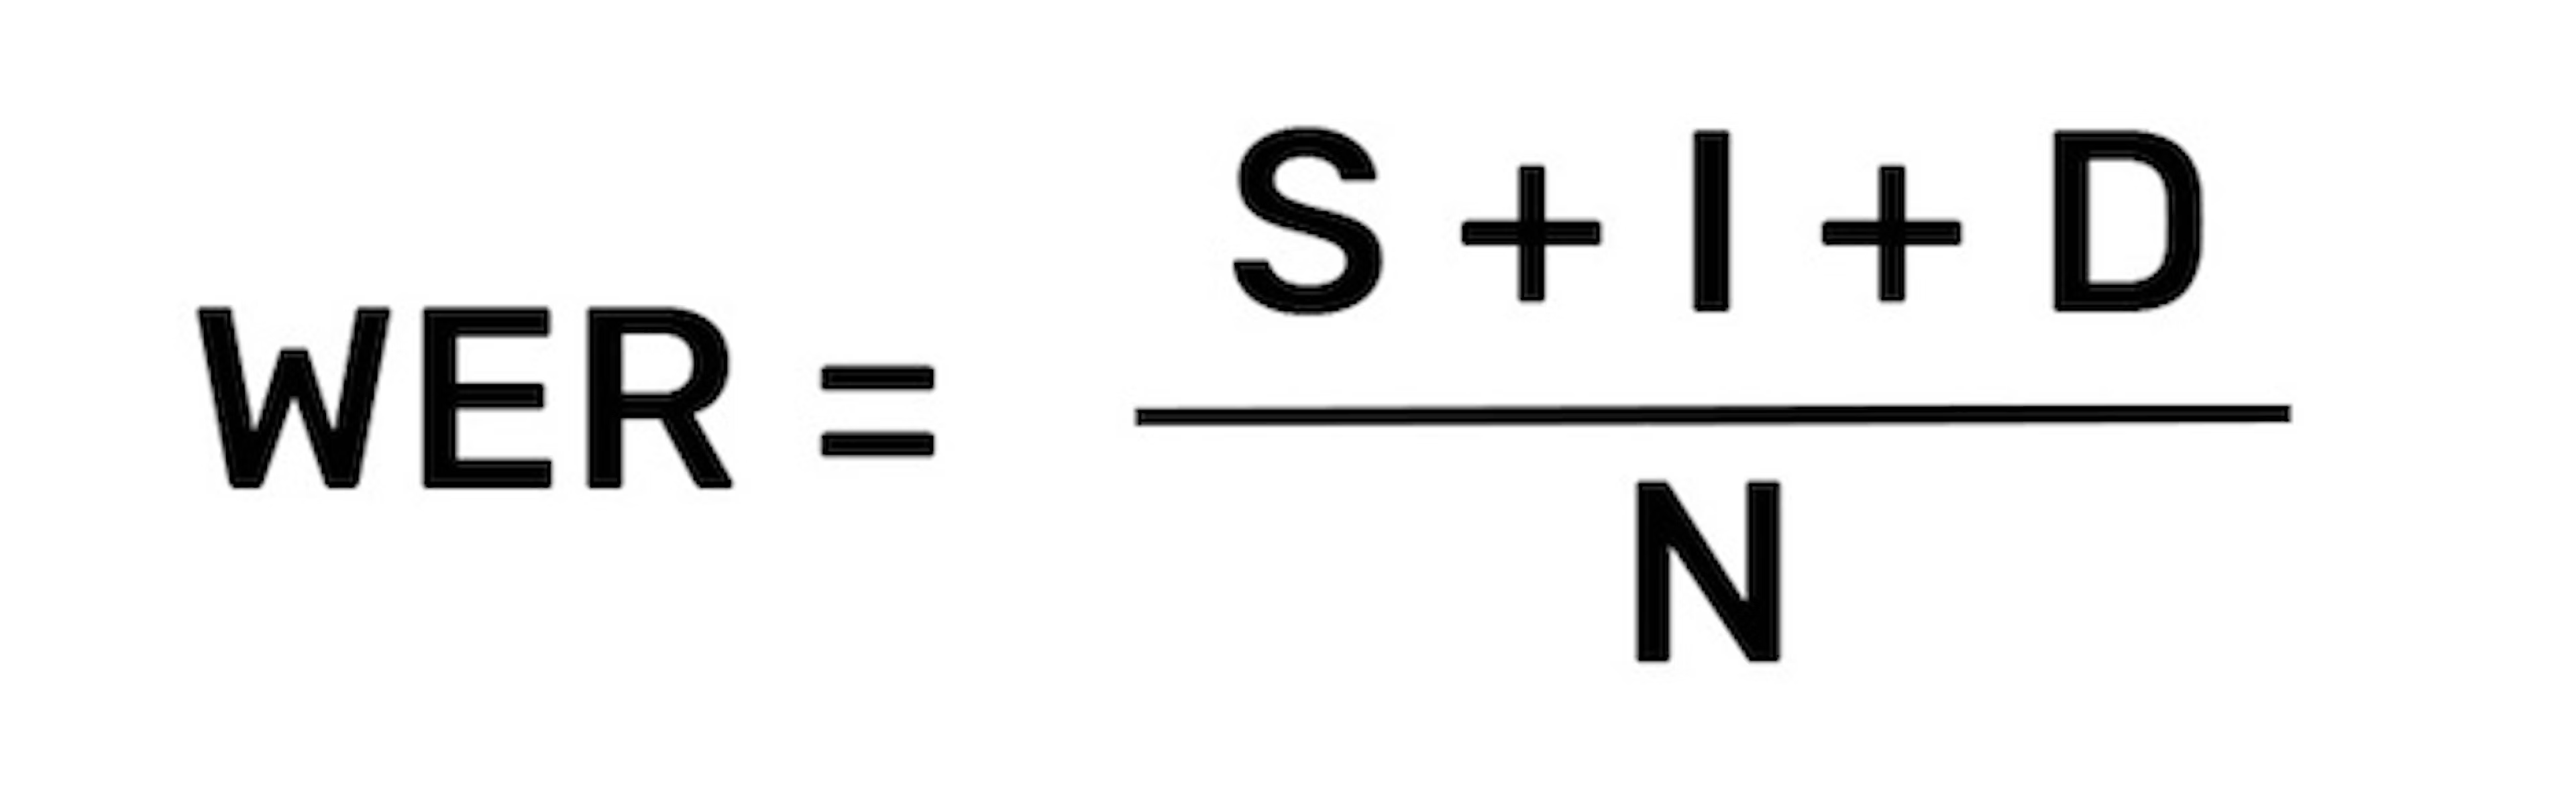

In [21]:
from jiwer import wer
import string
r = merged_df['transcript'].str.cat()
h = merged_df['Model_Transcript'].str.cat()
def preprocess(s):
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = ' '.join(s.split())
    return s

ref = preprocess(r)
hypo = preprocess(h)


wer(ref, hypo)

0.0905587668593449

In [22]:
from jiwer import process_words
out = process_words(ref, hypo)

substitutions = 0
deletions = 0
insertions = 0

for alignment in out.alignments:
    for chunk in alignment:
        if chunk.type == "substitute":
            substitutions += 1
        elif chunk.type == "delete":
            deletions += 1
        elif chunk.type == "insert":
            insertions += 1
print("Substitutions:",substitutions,"Deletions:",deletions,"Insertions:",insertions)
print("Total number of words:",len(ref.split()))


Substitutions: 71 Deletions: 7 Insertions: 7
Total number of words: 1038
